In [1]:
import os
import math
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
import math

In [8]:
Files= ["l1calo_hist_ZB_EN.root","l1calo_topocluster_test_Zee.root"] # "extended" includes isolation vars and extended_new trigger decision
DFs = []

for i in range (0,len(Files)):
  File = uproot.open(os.path.join(os.path.pardir, "data", Files[i]))
  Tree = File["tree_DMC"]
  DFs.append(Tree.arrays(library="pd"))
  print (DFs[i].shape, DFs[i].columns)

(21701, 27) Index(['TOB_ET', 'TOB_eta', 'TOB_ieta', 'TOB_ietabin', 'TOB_phi',
       'offline_ele_pt', 'offline_ele_eta', 'offline_ele_eta_cal',
       'offline_ele_phi', 'offline_ele_phi_cal', 'eFEX_Clus_SCETs',
       'legacy_ET', 'eFEX_ReC', 'eFEX_ReE', 'eFEX_RhE', 'eFEX_RhH', 'eFEX_WsN',
       'eFEX_WsD', 'ID', 'SuperCell_ET', 'lumiBlock', 'averageMu',
       'EventNumber', 'BDTScore', 'TopoCluster_ET', 'TopoCluster_eta',
       'TopoCluster_phi'],
      dtype='object')
(371765, 26) Index(['TOB_ET', 'TOB_eta', 'TOB_ieta', 'TOB_ietabin', 'TOB_phi',
       'offline_ele_pt', 'offline_ele_eta', 'offline_ele_eta_cal',
       'offline_ele_phi', 'offline_ele_phi_cal', 'eFEX_Clus_ETs', 'legacy_ET',
       'eFEX_ReC', 'eFEX_ReE', 'eFEX_RhE', 'eFEX_RhH', 'eFEX_WsN', 'eFEX_WsD',
       'ID', 'SuperCell_ET', 'lumiBlock', 'averageMu', 'BDTScore',
       'TopoCluster_ET', 'TopoCluster_eta', 'TopoCluster_phi'],
      dtype='object')


In [5]:
entry = DFs[0].loc[31]

TOB_ET = entry["TOB_ET"]
TOB_eta = entry["TOB_eta"]
TOB_phi = entry["TOB_phi"]
TopoCluster_ET = entry["TopoCluster_ET"]
TopoCluster_eta = entry["TopoCluster_eta"]
TopoCluster_phi = entry["TopoCluster_phi"]
SuperCell_ET = entry["SuperCell_ET"]

visualise_ROI(SuperCell_ET)
print(TOB_ET)
print(TOB_eta)
print(TOB_phi)
print(TopoCluster_ET, TopoCluster_ET.type)
print(TopoCluster_eta)
print(TopoCluster_phi)

28.9
-0.4375
1.030835
[4.6e+04, 2.02e+04, 5.46e+03, 4.68e+03, 1.45e+03, 1.22e+03, 943] 7 * float32
[-0.469, -0.478, -0.656, -0.615, -0.582, -0.459, -0.511]
[1.04, 0.967, 0.982, 1.02, 0.816, 1.26, 0.841]


In [33]:
# calculating euclidean distance between phi and eta coordinates
topocluster_distances = {}
topocluster_indecies_within_threashold = {}
topocluster_distance_threashold = 0.2
topocluster_num_threashold = 1
for i in range(len(TopoCluster_ET)):
    topocluster_distance = math.sqrt((TopoCluster_eta[i]-TOB_eta)**2+(TopoCluster_phi[i]-TOB_phi)**2)
    topocluster_distances[i] = topocluster_distance
    if topocluster_distance <= topocluster_distance_threashold:
        topocluster_indecies_within_threashold[i] = topocluster_distance
n_closest_topoclusters = sorted(topocluster_distances.items(), key=lambda item: item[1])[0:topocluster_num_threashold]


print("topocluster_distances",topocluster_distances)
print("n_closest",topocluster_indecies_within_threashold)

print("topocluster_indecies_within_threashold",topocluster_indecies_within_threashold)

topocluster_distances {0: 0.03181577904342365, 1: 0.07591069511740935, 2: 0.22357039434248396, 3: 0.17820837930427952, 4: 0.25844355136747194, 5: 0.22557045524280056, 6: 0.20345777066347168}
n_closest {0: 0.03181577904342365, 1: 0.07591069511740935, 3: 0.17820837930427952}
topocluster_indecies_within_threashold {0: 0.03181577904342365, 1: 0.07591069511740935, 3: 0.17820837930427952}


Number of rows with no non-zero elements: 8
Maximum number of non-zero elements in any row: 27


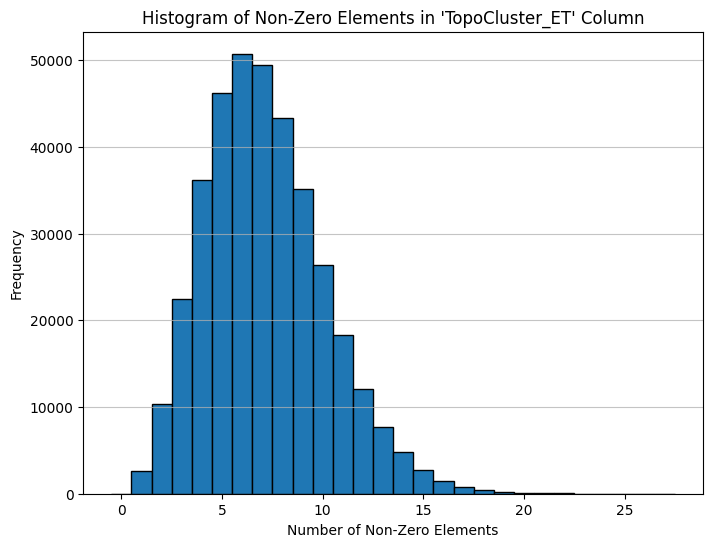

In [3]:
df= DFs[1]
list_lengths = df["TopoCluster_ET"].apply(lambda x: np.count_nonzero(x))

no_non_zero_count = df["TopoCluster_ET"].apply(lambda x: np.count_nonzero(x) == 0).sum()

print(f"Number of rows with no non-zero elements: {no_non_zero_count}")

max_non_zero = df["TopoCluster_ET"].apply(np.count_nonzero).max()

print(f"Maximum number of non-zero elements in any row: {max_non_zero}")

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(list_lengths, bins=range(min(list_lengths), max(list_lengths) + 2), edgecolor="black", align="left")
plt.title("Histogram of Non-Zero Elements in 'TopoCluster_ET' Column")
plt.xlabel("Number of Non-Zero Elements")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
def truncate_or_pad(arr, target_length=6):
    # Truncate if longer than target length
    if len(arr) > target_length:
        return arr[:target_length]
    # Pad with zeros if shorter
    elif len(arr) < target_length:
        return np.pad(arr, (0, target_length - len(arr)), constant_values=0)
    # Return as is if length matches
    else:
        return arr

In [12]:
df["TopoCluster_ET_training"] = df["TopoCluster_ET"].apply(lambda x: truncate_or_pad(x, target_length=6))
print(df["TopoCluster_ET_training"].head())

0    [33036.92578125, 706.2421875, 597.178161621093...
1    [37917.5390625, 1577.3807373046875, 757.399230...
2    [28215.45703125, 6086.505859375, 1296.21374511...
3    [41567.47265625, 3781.7685546875, 3098.0512695...
4    [35634.875, 6042.32568359375, 2174.47143554687...
Name: TopoCluster_ET_training, dtype: object


Number of rows with no non-zero elements: 8
Maximum number of non-zero elements in any row: 6


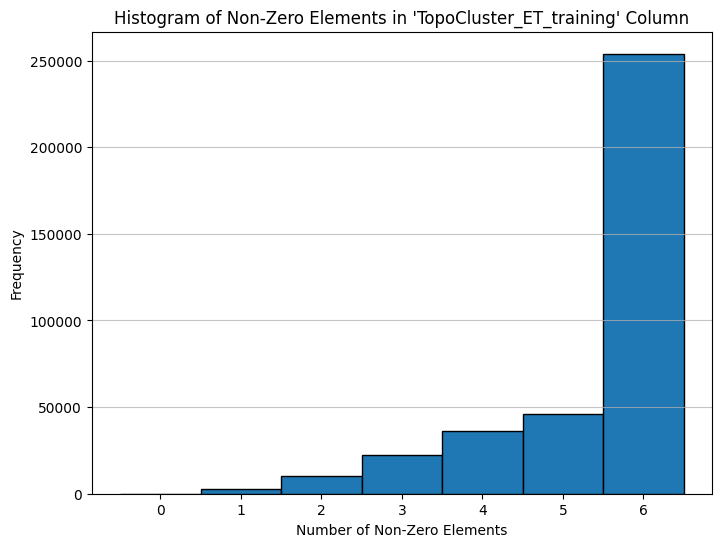

In [11]:
list_lengths = df["TopoCluster_ET_training"].apply(lambda x: np.count_nonzero(x))

no_non_zero_count = df["TopoCluster_ET_training"].apply(lambda x: np.count_nonzero(x) == 0).sum()

print(f"Number of rows with no non-zero elements: {no_non_zero_count}")

max_non_zero = df["TopoCluster_ET_training"].apply(np.count_nonzero).max()

print(f"Maximum number of non-zero elements in any row: {max_non_zero}")

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(list_lengths, bins=range(min(list_lengths), max(list_lengths) + 2), edgecolor="black", align="left")
plt.title("Histogram of Non-Zero Elements in 'TopoCluster_ET_training' Column")
plt.xlabel("Number of Non-Zero Elements")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
def calculate_topo_barycentre(TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis):
    barycentre = [0,0]
    ET_total = sum(TopoCluster_ETs)
    barycentre[0] = sum(x * m for x, m in zip(TopoCluster_etas, TopoCluster_ETs)) / ET_total
    barycentre[1] = sum(y * m for y, m in zip(TopoCluster_phis, TopoCluster_ETs)) / ET_total
    return barycentre


In [25]:
def get_distances_to_barycentre(barycentre,TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis):
    topocluster_distances = [0 for i in range(len(TopoCluster_ETs))]
    for i in range(len(TopoCluster_ETs)):
        topocluster_distance = math.sqrt((TopoCluster_etas[i]-barycentre[0])**2+(TopoCluster_phis[i]-barycentre[1])**2)
        topocluster_distances[i] = topocluster_distance
    return topocluster_distances

In [40]:
def get_ET_distribution(distance_boundaries,topocluster_distances,TopoCluster_ETs):
    lower_boundry = 0
    topocluster_ET_distribution = [0 for i in range(len(distance_boundaries))]
    for i, upper_boundry in enumerate(distance_boundaries):
        for j, topocluster_distance in enumerate(topocluster_distances):
            if topocluster_distance > lower_boundry and topocluster_distance <= upper_boundry:
                topocluster_ET_distribution[i] += TopoCluster_ETs[j]
        lower_boundry = upper_boundry
    return np.array(topocluster_ET_distribution)
        

In [41]:
distance_boundaries = [0.1,0.2,0.3,0.4]


entry = DFs[0].loc[31]
TOB_ETs = entry["TOB_ET"]
TOB_etas = entry["TOB_eta"]
TOB_phis = entry["TOB_phi"]
TopoCluster_ETs = entry["TopoCluster_ET"]
TopoCluster_etas = entry["TopoCluster_eta"]
TopoCluster_phis = entry["TopoCluster_phi"]

print(TOB_ET)
print(TOB_eta)
print(TOB_phi)
print(TopoCluster_ETs, TopoCluster_ET.type)
print(TopoCluster_etas)
print(TopoCluster_phis)

barycentre = calculate_topo_barycentre(TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis)
topocluster_distances = get_distances_to_barycentre(barycentre,TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis)
topocluster_ET_distribution = get_ET_distribution(distance_boundaries,topocluster_distances,TopoCluster_ETs)

print(barycentre)
print(topocluster_distances)
print(topocluster_ET_distribution)

28.9
-0.4375
1.030835
[4.6e+04, 2.02e+04, 5.46e+03, 4.68e+03, 1.45e+03, 1.22e+03, 943] 7 * float32
[-0.469, -0.478, -0.656, -0.615, -0.582, -0.459, -0.511]
[1.04, 0.967, 0.982, 1.02, 0.816, 1.26, 0.841]
[np.float32(-0.4948953), np.float32(1.0110786)]
[0.036328792694067566, 0.04741035904094105, 0.1633894203847879, 0.1206674416582314, 0.2132046771665708, 0.24701509122460863, 0.17073943234299813]
[66232.84375    11080.90234375  2668.6081543      0.        ]


In [ ]:
ET_distributions = [None for i in range(DFs[0].shape[0])]
for i in range(DFs[0].shape[0]):
    entry = DFs[0].loc[i]
    TopoCluster_ETs = entry["TopoCluster_ET"]
    TopoCluster_etas = entry["TopoCluster_eta"]
    TopoCluster_phis = entry["TopoCluster_phi"]
    barycentre = calculate_topo_barycentre(TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis)
    topocluster_distances = get_distances_to_barycentre(barycentre,TopoCluster_ETs,TopoCluster_etas,TopoCluster_phis)
    ET_distributions[i] = get_ET_distribution(distance_boundaries,topocluster_distances,TopoCluster_ETs)
    
DFs[0]["ET_distributions"] = ET_distributions




In [4]:
X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir="topocluster_test_Z_EN", format_mode="topocluster_ET_boundaries")

preprepared data in ..\data\topocluster_test_Z_EN is missing, preparing and saving here
attempting to generate topo training data
0.0 %
0.3 %
0.5 %
0.8 %
1.1 %
1.3 %
1.6 %
1.9 %
2.2 %
2.4 %
2.7 %
3.0 %
3.2 %
3.5 %
3.8 %
4.0 %
4.3 %
4.6 %
4.8 %
5.1 %
5.4 %
5.6 %
5.9 %
6.2 %
6.5 %
6.7 %
7.0 %
7.3 %
7.5 %
7.8 %
8.1 %
8.3 %
8.6 %
8.9 %
9.1 %
9.4 %
9.7 %
10.0 %
10.2 %
10.5 %
10.8 %
11.0 %
11.3 %
11.6 %
11.8 %
12.1 %
12.4 %
12.6 %
12.9 %
13.2 %
13.4 %
13.7 %
14.0 %
14.3 %
14.5 %
14.8 %
15.1 %
15.3 %
15.6 %
15.9 %
16.1 %
16.4 %
16.7 %
16.9 %
17.2 %
17.5 %
17.8 %
18.0 %
18.3 %
18.6 %
18.8 %
19.1 %
19.4 %
19.6 %
19.9 %
20.2 %
20.4 %
20.7 %
21.0 %
21.2 %
21.5 %
21.8 %
22.1 %
22.3 %
22.6 %
22.9 %
23.1 %
23.4 %
23.7 %
23.9 %
24.2 %
24.5 %
24.7 %
25.0 %
25.3 %
25.6 %
25.8 %
26.1 %
26.4 %
26.6 %
26.9 %
27.2 %
27.4 %
27.7 %
28.0 %
28.2 %
28.5 %
28.8 %
29.1 %
29.3 %
29.6 %
29.9 %
30.1 %
30.4 %
30.7 %
30.9 %
31.2 %
31.5 %
31.7 %
32.0 %
32.3 %
32.5 %
32.8 %
33.1 %
33.4 %
33.6 %
33.9 %
34.2 %
34.4 %
34.7

In [5]:
from sklearn.linear_model import SGDClassifier
hinge_sgd_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
hinge_sgd_clf.fit(X_train, y_train)
y_pred_hinge = hinge_sgd_clf.predict(X_test)
pd_passthrough_test["pred_hinge"] = y_pred_hinge
evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")



Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]


In [6]:
#With Sample Weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight("balanced", y_train)
hinge_sgd_clfw = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
hinge_sgd_clfw.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_hingew = hinge_sgd_clfw.predict(X_test)
pd_passthrough_test["pred_hinge"] = y_pred_hingew
evaluate_sklearn_model(y_test, y_pred_hingew, show_CR=False, show_MSE=False, model_name="hinge")


Evaluation of hinge
Accuracy: 0.89286350
Recall: 0.89947809
Precision: 0.98587583
F1 Score: 0.94069734
Confusion Matrix:
 [[ 3394   958]
 [ 7473 66869]]


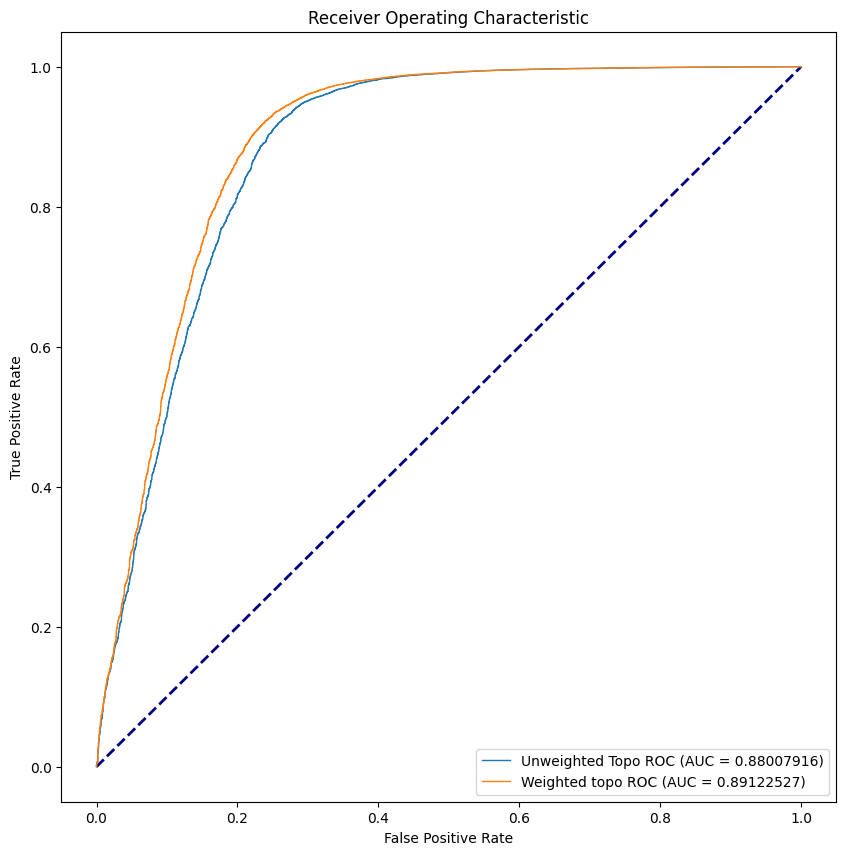

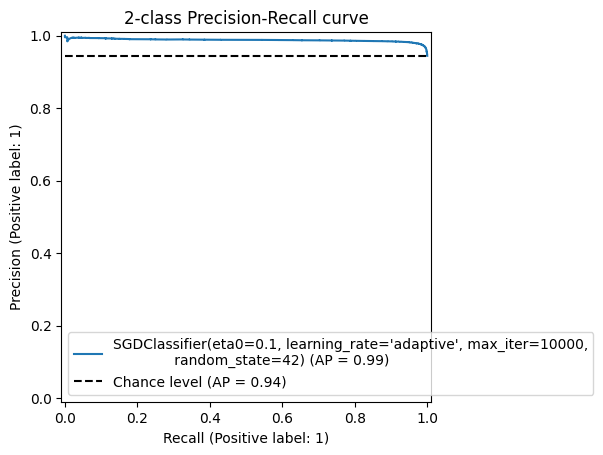

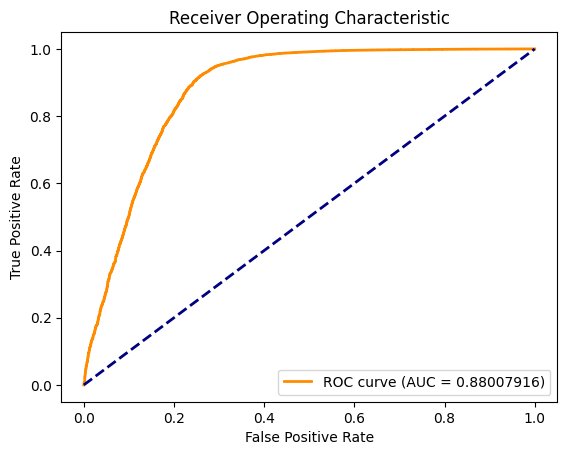

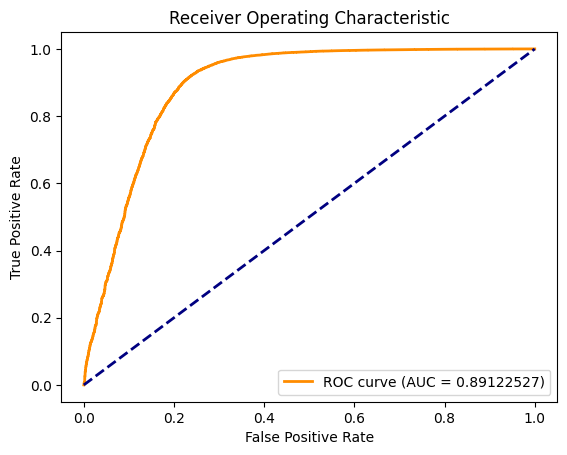

In [7]:
multi_roc({"Unweighted Topo":hinge_sgd_clf,"Weighted topo":hinge_sgd_clfw}, X_test, y_test)

precision_recall(hinge_sgd_clf, X_test, y_test)
fpr, tpr, roc_auc = compute_roc(hinge_sgd_clf, X_test, y_test)
plot_roc(fpr, tpr, roc_auc)
fpr, tpr, roc_auc = compute_roc(hinge_sgd_clfw, X_test, y_test)
plot_roc(fpr, tpr, roc_auc)

In [18]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
pd_passthrough_test["pred_"] = y_pred
evaluate_sklearn_model(y_test, y_pred, show_CR=False, show_MSE=False, model_name="svm")

Evaluation of svm
Accuracy: 0.9973
Confusion Matrix:
 [[   30   197]
 [    3 74355]]


In [19]:
#With Sample Weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight("balanced", y_train)
svm_clfw = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clfw.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_w = svm_clfw.predict(X_test)
pd_passthrough_test["pred_w"] = y_pred_w
evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="svm w")


Evaluation of svm w
Accuracy: 0.9311
Confusion Matrix:
 [[  172    55]
 [ 5082 69276]]


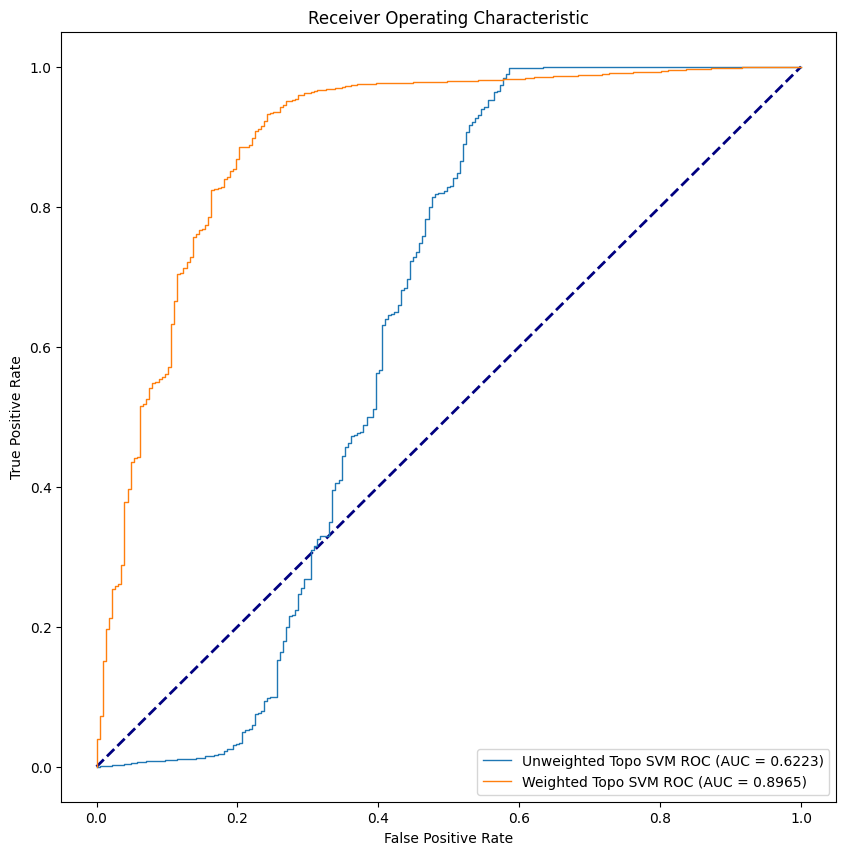

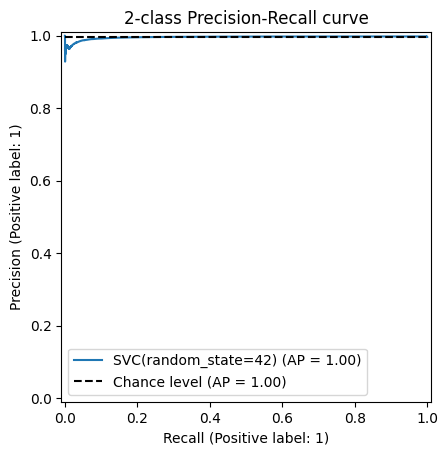

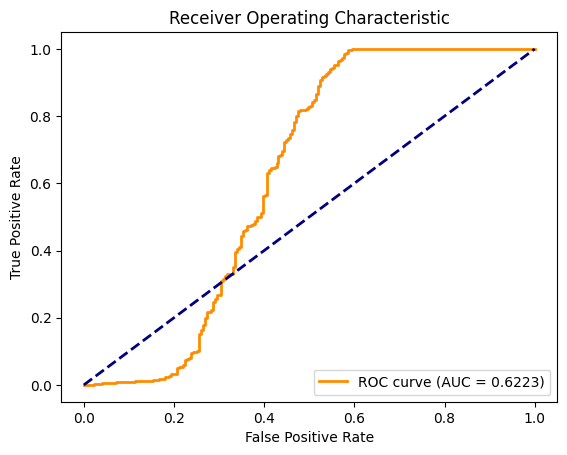

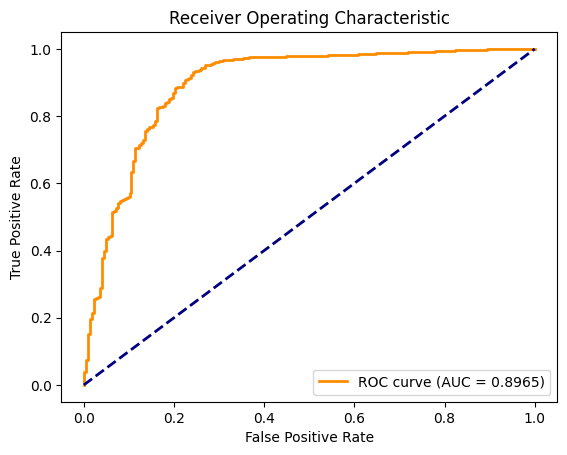

In [20]:
multi_roc({"Unweighted Topo SVM":svm_clf,"Weighted Topo SVM":svm_clfw}, X_test, y_test)

precision_recall(svm_clf, X_test, y_test)
fpr, tpr, roc_auc = compute_roc(svm_clf, X_test, y_test)
plot_roc(fpr, tpr, roc_auc)
fpr, tpr, roc_auc = compute_roc(svm_clfw, X_test, y_test)
plot_roc(fpr, tpr, roc_auc)

In [3]:
visualise_topocluster_ETs(DFs[0])


0.0 %
86.3 %


In [4]:
visualise_topocluster_ETs(DFs[1])

0.0 %
0.3 %
0.5 %
0.8 %
1.1 %
1.3 %
1.6 %
1.9 %
2.2 %
2.4 %
2.7 %
3.0 %
3.2 %
3.5 %
3.8 %
4.0 %
4.3 %
4.6 %
4.8 %
5.1 %
5.4 %
5.6 %
5.9 %
6.2 %
6.5 %
6.7 %
7.0 %
7.3 %
7.5 %
7.8 %
8.1 %
8.3 %
8.6 %
8.9 %
9.1 %
9.4 %
9.7 %
10.0 %
10.2 %
10.5 %
10.8 %
11.0 %
11.3 %
11.6 %
11.8 %
12.1 %
12.4 %
12.6 %
12.9 %
13.2 %
13.4 %
13.7 %
14.0 %
14.3 %
14.5 %
14.8 %
15.1 %
15.3 %
15.6 %
15.9 %
16.1 %
16.4 %
16.7 %
16.9 %
17.2 %
17.5 %
17.8 %
18.0 %
18.3 %
18.6 %
18.8 %
19.1 %
19.4 %
19.6 %
19.9 %
20.2 %
20.4 %
20.7 %
21.0 %
21.2 %
21.5 %
21.8 %
22.1 %
22.3 %
22.6 %
22.9 %
23.1 %
23.4 %
23.7 %
23.9 %
24.2 %
24.5 %
24.7 %
25.0 %
25.3 %
25.6 %
25.8 %
26.1 %
26.4 %
26.6 %
26.9 %
27.2 %
27.4 %
27.7 %
28.0 %
28.2 %
28.5 %
28.8 %
29.1 %
29.3 %
29.6 %
29.9 %
30.1 %
30.4 %
30.7 %
30.9 %
31.2 %
31.5 %
31.7 %
32.0 %
32.3 %
32.5 %
32.8 %
33.1 %
33.4 %
33.6 %
33.9 %
34.2 %
34.4 %
34.7 %
35.0 %
35.2 %
35.5 %
35.8 %
36.0 %
36.3 %
36.6 %
36.9 %
37.1 %
37.4 %
37.7 %
37.9 %
38.2 %
38.5 %
38.7 %
39.0 %
39.3 %
39.5 %
3